In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import features

from IPython.core.pylabtools import figsize
figsize(10, 6)

Explained variance ratio: [0.66773297 0.33096893 0.0012981 ]


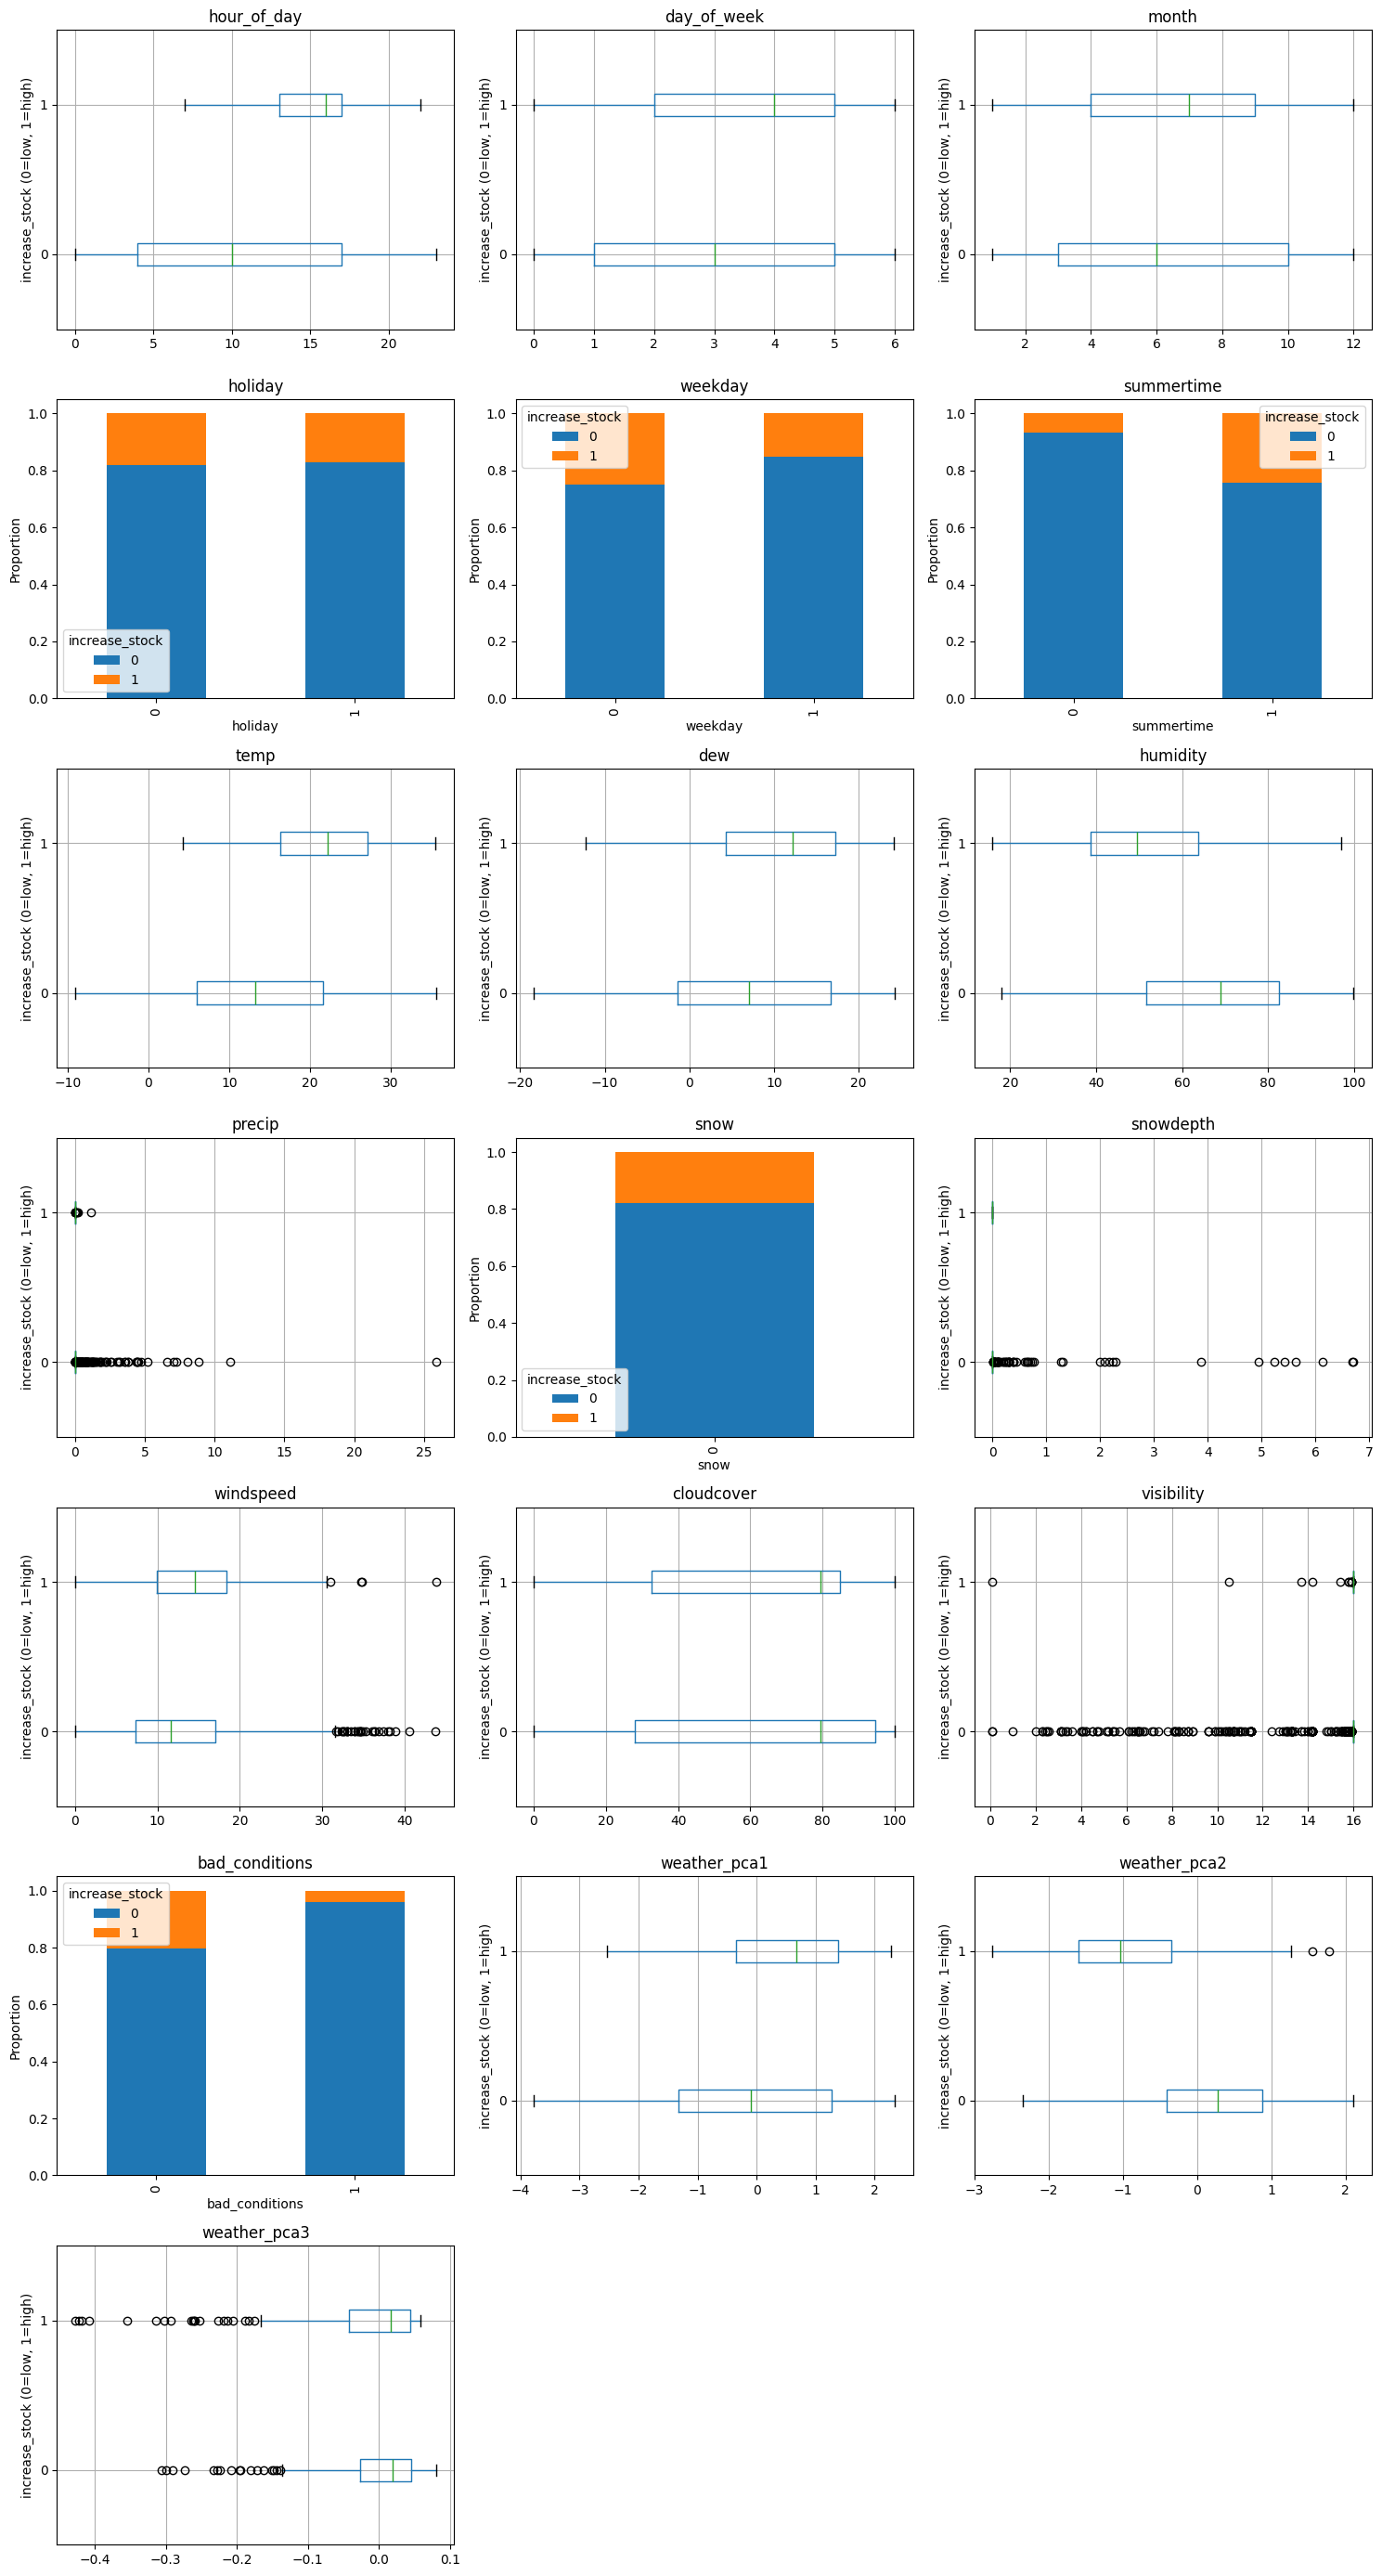

In [2]:
bikes = features.combined_features()
bikes["increase_stock_num"] = bikes["increase_stock"].map({
    "low_bike_demand": 0,
    "high_bike_demand": 1
})



categorical = ['snow', 'holiday', 'weekday', 'summertime', 'bad_conditions']
features = bikes.drop(columns=["increase_stock", "increase_stock_num"]).columns

n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

plot_index = 0

for col in features:
    ax = axes[plot_index]

    if col in categorical:
        # Create normalized crosstab
        ct = pd.crosstab(
            bikes[col],
            bikes["increase_stock_num"],
            normalize="index"
        )

        ct.plot(kind="bar", stacked=True, ax=ax)
        ax.set_title(col)
        ax.set_ylabel("Proportion")
        ax.legend(title="increase_stock")

    else:
        bikes.boxplot(
            column=col,
            by="increase_stock_num",
            vert=False,
            ax=ax
        )
        ax.set_title(col)
        ax.set_ylabel("increase_stock (0=low, 1=high)")

    plot_index += 1

for j in range(plot_index, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("")
plt.tight_layout()
plt.show()
